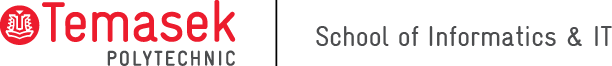
## <center>  Machine Learning for Decision Making (CDA2C05)</center>
### <center>  Practical 3 : Dive Deeper in Tree-Based Algorithms </center>

### <font color=blue> Gentle Instructions: </font>
- The empty code cells are for you to experiment your codes. Feel free to add more cells.
- Replace <font color="Purple"><b> ? </font></b> with correct syntax and use short cut key <i> Shift + Enter </i> to execute your cells.
- Double click on markdown cells to enter your remarks, observations, best practices, etc. Execute your markdown cells to view them properly. 

## 1. Many trees become a forest?
We have learned in the previous practical that while decision tree is a popular algorithm in machine learning, it can suffer from overfitting, where they become too complex and fit the training data too closely but perform poorly on new data. 
> To address this issue, a random forest algorithm can be used. Explore more on this algorithm that combines multiple decision trees and aggregates their predictions to improve accuracy and reduce overfitting. Find out about its own pros and cons before deciding whether to use it for your e.g. Project. 
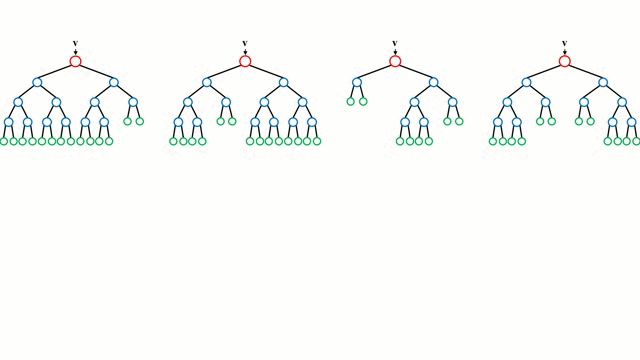

## 2. Overfitting in DT
Let's obtain evidences that overfitting is so prevalent in DT. 

<div class="alert alert-block alert-info">
<b>Remember we saved our LR and DTR models in the last practical? We do not need to build them all over again.</b>
    
    - Use joblib.load() 
</div>

In [1]:
#import all the necessary libraries
#load the dataset as df
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score , mean_absolute_percentage_error
from sklearn import tree
from random import randrange, uniform


In [2]:
#Load the saved models
my_lr, my_dtr = joblib.load('models.joblib')

In [3]:
#load the saved dfs
X_train=pd.read_pickle('Xtrain.pkl')
X_test=pd.read_pickle('Xtest.pkl')
y_train=pd.read_pickle('ytrain.pkl')
y_test=pd.read_pickle('ytest.pkl')

In [4]:
#Visualise the dtr again
text_representation = tree.export_text(my_dtr,feature_names=list(X_train.columns), max_depth=5)
print(text_representation)

|--- Ram (GB) <= 14.00
|   |--- Ram (GB) <= 7.00
|   |   |--- Cpu <= 51.50
|   |   |   |--- Cpu <= 40.00
|   |   |   |   |--- Memory <= 20.50
|   |   |   |   |   |--- ScreenResolution <= 0.50
|   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |--- ScreenResolution >  0.50
|   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |--- Memory >  20.50
|   |   |   |   |   |--- Weight (Kg) <= 1.94
|   |   |   |   |   |   |--- truncated branch of depth 11
|   |   |   |   |   |--- Weight (Kg) >  1.94
|   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |--- Cpu >  40.00
|   |   |   |   |--- Inches <= 14.80
|   |   |   |   |   |--- Weight (Kg) <= 1.28
|   |   |   |   |   |   |--- value: [989.00]
|   |   |   |   |   |--- Weight (Kg) >  1.28
|   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |--- Inches >  14.80
|   |   |   |   |   |--- Product <= 213.50
|   |   |   |   |   |   |--- truncated branch of depth 10
|   |

<div class="alert alert-block alert-warning">
<b>What do you notice?</b>
    
    1. What will happen to the decision if there are e.g. new laptops with new weight? Or the 'Inches' is not required?
    2. If you train a new model with a new training data due to the (1), the tree model will look very different from 
    the current. 
</div>

<div class="alert alert-block alert-info">
<b>Now, print out the common regression metrics for both models. </b>
    
     For each model, print out for both training set and validation set.
</div>

In [5]:
#make predictions (because we did not save it in P02)
y_pred_lr_train=my_lr.predict(X_train)
y_pred_lr_test=my_lr.predict(X_test)

y_pred_dtr_train=my_dtr.predict(X_train)
y_pred_dtr_test=my_dtr.predict(X_test)

#### LINEAR REGRESSION

In [6]:
print("*****Training Set*****")
print("MSE: %.2f" % mean_squared_error(y_train, y_pred_lr_train))
print("R2: %.2f" % r2_score(y_train, y_pred_lr_train))
print("MAPE: %.2f" % mean_absolute_percentage_error(y_train, y_pred_lr_train))
print("MAE: %.2f" % mean_absolute_error(y_train, y_pred_lr_train))
print("*****Validation Set*****")
print("MSE: %.2f" % mean_squared_error(y_test, y_pred_lr_test))
print("R2: %.2f" % r2_score(y_test, y_pred_lr_test))
print("MAPE: %.2f" % mean_absolute_percentage_error(y_test, y_pred_lr_test))
print("MAE: %.2f" % mean_absolute_error(y_test, y_pred_lr_test))

*****Training Set*****
MSE: 172725.58
R2: 0.66
MAPE: 0.33
MAE: 302.47
*****Validation Set*****
MSE: 132078.97
R2: 0.69
MAPE: 0.29
MAE: 279.49


#### DECISION TREE REGRESSOR

In [7]:
print("*****Training Set*****")
print("MSE: %.2f" % mean_squared_error(y_train, y_pred_dtr_train))
print("R2: %.2f" % r2_score(y_train, y_pred_lr_train))
print("MAPE: %.2f" % mean_absolute_percentage_error(y_train, y_pred_dtr_train))
print("MAE: %.2f" % mean_absolute_error(y_train, y_pred_dtr_train))
print("*****Validation Set*****")
print("MSE: %.2f" % mean_squared_error(y_test, y_pred_dtr_test))
print("R2: %.2f" % r2_score(y_test, y_pred_dtr_test))
print("MAPE: %.2f" % mean_absolute_percentage_error(y_test, y_pred_dtr_test))
print("MAE: %.2f" % mean_absolute_error(y_test, y_pred_dtr_test))

*****Training Set*****
MSE: 157.99
R2: 0.66
MAPE: 0.00
MAE: 1.53
*****Validation Set*****
MSE: 129832.28
R2: 0.69
MAPE: 0.20
MAE: 232.83


<div class="alert alert-block alert-danger">
<b>What do you notice?</b>
    
    What are at least two reasons for such observations?
</div>

Your takeaways:
1.  Decision Tree is overfitted as the MSE for valid is significantly higher than MSE for training.
2. DT is overfitted as it has almost no error.
2.  Decision Tree makes predictions more accurate than Linear Regression.
    

## 3. DT for Classification
Decision trees can also be used for classification tasks. In the case of binary classification, a decision tree divides the feature space into two regions, one for each class. E.g. in the use case of cancer diagnosis, using age, medical history, exercise and eating habit predict whether a patient has cancer (T) or not (F). 

Classification tasks can also take the form of multiclass classification: E.g. in the 'infamous' dataset of iris (a type of flower) dataset where the decision is either of 'Type 1', 'Type 2' or 'Type 3'. 

As with Decision Tree Regressors, Decision Tree Classifiers can suffer from overfitting too. There can be Random Forest Classifiers to help with reducing this problem.

### 3.1 Binary Classification

<div class="alert alert-block alert-info">
<b>Take reference from the DTR codes and build a binary DTC.</b>
</div>

In [8]:
from sklearn.tree import DecisionTreeClassifier
df=pd.read_csv('BostonHousingPrice.csv')
df.head()

,S/N,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TARGET
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


#### We shall skip the EDA.
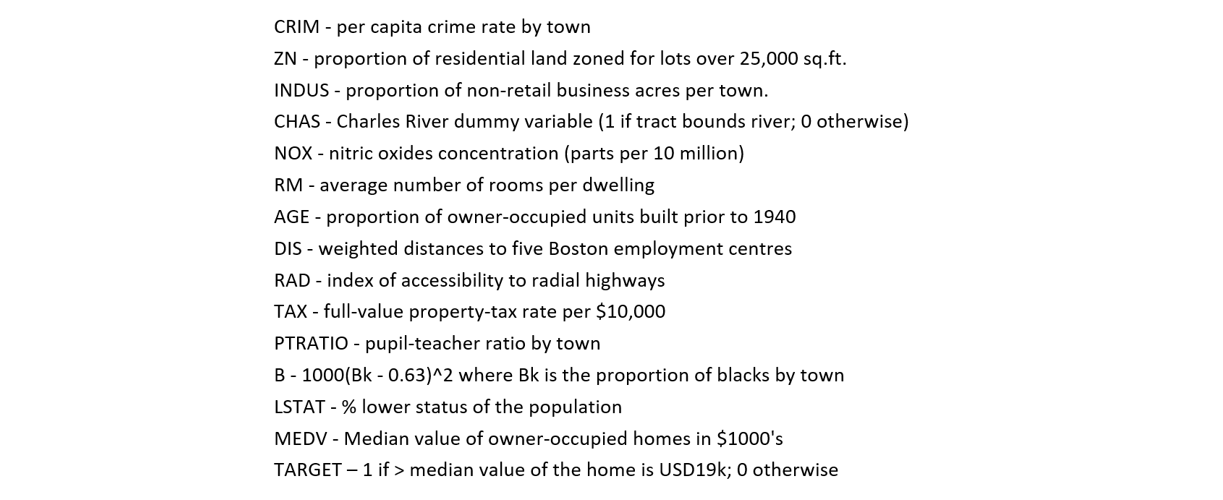

<div class="alert alert-block alert-info">
<b>No need to perform features encoding as all independent variables are numerical.</b>
</div>

In [9]:
#Set target and inputs
X = df.drop(columns=['MEDV', 'TARGET', 'S/N']) 
y = df['TARGET'] 

In [10]:
#Data partition
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    shuffle = True, random_state=8888)

In [11]:
X_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
87,0.07151,0.0,4.49,0,0.449,6.121,56.8,3.7476,3,247,18.5,395.15,8.44
160,1.27346,0.0,19.58,1,0.605,6.250,92.6,1.7984,5,403,14.7,338.92,5.50
39,0.02763,75.0,2.95,0,0.428,6.595,21.8,5.4011,3,252,18.3,395.63,4.32
499,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10
334,0.03738,0.0,5.19,0,0.515,6.310,38.5,6.4584,5,224,20.2,389.40,6.75


In [12]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
174,0.08447,0.0,4.05,0,0.510,5.859,68.7,2.7019,5,296,16.6,393.23,9.64
469,13.07510,0.0,18.10,0,0.580,5.713,56.7,2.8237,24,666,20.2,396.90,14.76
297,0.14103,0.0,13.92,0,0.437,5.790,58.0,6.3200,4,289,16.0,396.90,15.84
187,0.07875,45.0,3.44,0,0.437,6.782,41.1,3.7886,5,398,15.2,393.87,6.68
250,0.14030,22.0,5.86,0,0.431,6.487,13.0,7.3967,7,330,19.1,396.28,5.90


In [13]:
#Build DTC
my_dtc = DecisionTreeClassifier(random_state=1234).fit(X_train, y_train)
y_pred_dtc = my_dtc.predict(X_test)

In [14]:
#Visualise
X_test2 = pd.concat([X_test.reset_index(), pd.DataFrame(y_pred_dtc, columns=['Prediction'])], axis=1)

In [15]:
X_test2.head()

,index,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Prediction
0,87,0.07151,0.0,4.49,0,0.449,6.121,56.8,3.7476,3,247,18.5,395.15,8.44,1
1,160,1.27346,0.0,19.58,1,0.605,6.250,92.6,1.7984,5,403,14.7,338.92,5.50,1
2,39,0.02763,75.0,2.95,0,0.428,6.595,21.8,5.4011,3,252,18.3,395.63,4.32,1
3,499,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,1
4,334,0.03738,0.0,5.19,0,0.515,6.310,38.5,6.4584,5,224,20.2,389.40,6.75,1


In [16]:
#Any other representation?
text_presentation = tree.export_text(my_dtc, feature_names=list(X_train.columns), max_depth=3)
print(text_presentation)

|--- LSTAT <= 14.80
|   |--- LSTAT <= 10.43
|   |   |--- CRIM <= 30.18
|   |   |   |--- DIS <= 10.65
|   |   |   |   |--- truncated branch of depth 3
|   |   |   |--- DIS >  10.65
|   |   |   |   |--- truncated branch of depth 2
|   |   |--- CRIM >  30.18
|   |   |   |--- class: 0
|   |--- LSTAT >  10.43
|   |   |--- DIS <= 5.59
|   |   |   |--- B <= 114.68
|   |   |   |   |--- class: 0
|   |   |   |--- B >  114.68
|   |   |   |   |--- truncated branch of depth 6
|   |   |--- DIS >  5.59
|   |   |   |--- PTRATIO <= 16.85
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- PTRATIO >  16.85
|   |   |   |   |--- class: 0
|--- LSTAT >  14.80
|   |--- CRIM <= 0.29
|   |   |--- AGE <= 94.05
|   |   |   |--- INDUS <= 7.74
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- INDUS >  7.74
|   |   |   |   |--- truncated branch of depth 3
|   |   |--- AGE >  94.05
|   |   |   |--- CRIM <= 0.15
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- CRIM >  0.

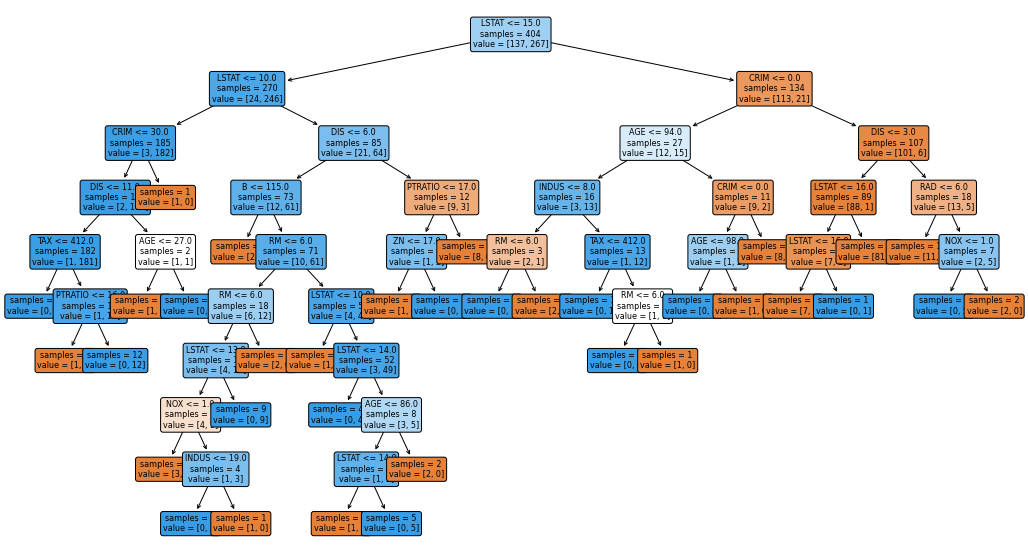

In [17]:
plt.figure(figsize=(18, 10))
tree.plot_tree(my_dtc, feature_names=list(X_train.columns), max_depth=my_dtc.get_depth(), 
               filled=True, fontsize=8, impurity=False, precision=0, rounded=True)

plt.show()

<div class="alert alert-block alert-info">
<b>Check the performance.</b>
    
    - Discuss with your peers, apart from accuracy, what metric(s) would be suitable for classification models?
    - Can you print them out?
</div>

In [18]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_dtc)
print("Accuracy: ", np.round(accuracy*100,2), "%", sep="")

Accuracy: 79.41%


### 3.2 Multiclass Classification

#### We shall use the simple Iris Dataset for this exercise. What exactly is the Iris Dataset?

In [19]:
# Load Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [20]:
#Build Multi-class DTC
my_dtc_m = DecisionTreeClassifier(random_state=1234).fit(X_train, y_train)
y_pred_dtc_m = my_dtc_m.predict(X_test)
y_pred_dtc_m

array([1, 1, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1,
       1, 1, 2, 0, 2, 1, 2, 0])

<div class="alert alert-block alert-warning">
<b> Can you use the same metrics used for binary classification here too?</b>
    
    - Will the model perform better in predicting a certain type of iris, say 'Type 1' and lousy at identifying the 
    others?
    - How can you find out?
</div>

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
cm =confusion_matrix(y_test, y_pred_dtc_m)
print("Confusion Matrix: \n", cm, "\n")
report = classification_report(y_test, y_pred_dtc_m)
print("Classification Report: \n", report)

Confusion Matrix: 
 [[ 9  0  0]
 [ 0 13  0]
 [ 0  0  8]] 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## 4. Summary
We have successfully performed the following:
- perform a binary classification and multiclass classification tasks respectively
- build DTCs
- visualise DTCs
- understand the different metrics for classification models. 

### <center>Remember to save your work <center>

### Further Exploration on Scenarios to use Appropriate Metrics

#### Systematic Error

In [22]:
y_test1 = np.array([1,1.1,5,10,15,15.1])
y_1 = np.array([5.,5.1,9,14,19,19.1])#systemically +4
print('MAE:', mean_absolute_error(y_test1, y_1))
print('MSE:',mean_squared_error(y_test1, y_1))
print('R2:',r2_score(y_test1, y_1))
print('MAPE:',mean_absolute_percentage_error(y_test1, y_1))

MAE: 4.0
MSE: 16.000000000000004
R2: 0.5404793056131729
MAPE: 1.5613218275469931


In [23]:
y_test1 = np.array([1,1.1,5,10])
y_1 = np.array([5.,5.1,9,14])
print('MAE:', mean_absolute_error(y_test1, y_1))
print('MSE:',mean_squared_error(y_test1, y_1))
print('R2:',r2_score(y_test1, y_1))
print('MAPE:',mean_absolute_percentage_error(y_test1, y_1))

MAE: 4.0
MSE: 16.0
R2: -0.18283047636649252
MAPE: 2.209090909090909


In [24]:
y_test1 = np.arange(start=1, stop=10, step=2)
y_1 = y_test + 4
print('MAE:', mean_absolute_error(y_test1, y_1))
print('MSE:',mean_squared_error(y_test1, y_1))
print('R2:',r2_score(y_test1, y_1))
print('MAPE:',mean_absolute_percentage_error(y_test1, y_1))

ValueError: Found input variables with inconsistent numbers of samples: [5, 30]

In [ ]:
y_test1 = np.arange(start=1, stop=100, step=2)
y_1 = y_test + 4
print('MAE:', mean_absolute_error(y_test1, y_1))
print('MSE:',mean_squared_error(y_test1, y_1))
print('R2:',r2_score(y_test1, y_1))
print('MAPE:',mean_absolute_percentage_error(y_test1, y_1))

#### Random Error

In [ ]:
y_test1 = np.arange(start=1, stop=100, step=2)
y_1 = y_test * uniform(0.95, 1.05)
print(y_1)
print('MAE:', mean_absolute_error(y_test1, y_1))
print('MSE:',mean_squared_error(y_test1, y_1))
print('R2:',r2_score(y_test1, y_1))
print('MAPE:',mean_absolute_percentage_error(y_test1, y_1))

In [ ]:
y_test1 = np.arange(start=1, stop=10, step=0.2)
y_1 = y_test * uniform(0.95, 1.05)
print(y_1)
print('MAE:', mean_absolute_error(y_test1, y_1))
print('MSE:',mean_squared_error(y_test1, y_1))
print('R2:',r2_score(y_test1, y_1))
print('MAPE:',mean_absolute_percentage_error(y_test1, y_1))